<a href="https://colab.research.google.com/github/ramakrishna12343/NLP-Assignment/blob/main/01_02_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Reviews.csv',nrows=1000)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
from nltk.corpus import stopwords

from textblob import TextBlob

from textblob import Word



# Lower casing and removing punctuations

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df['Text'] = df['Text'].str.replace('[^\w\s]',' ')



# Removal of stop words

stop = stopwords.words('english')

df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))



# Spelling correction

df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))



# Lemmatization

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))



df.Text.head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labelled lumbo halted peanuts....
2,"connection around centuries. light, pillow cit..."
3,looking secret ingredient robitussin believe f...
4,great staff great price. wide assortment mummy...


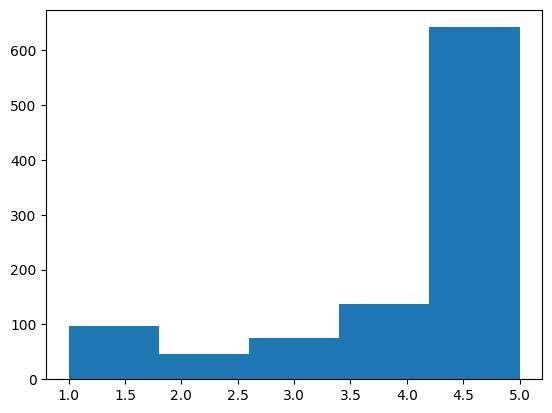

Score
1     98
2     47
3     75
4    138
5    642
Name: Id, dtype: int64


In [8]:
reviews = df



# Dropping null values

reviews.dropna(inplace=True)



# The histogram reveals this dataset is highly unbalanced towards high rating.

reviews.Score.hist(bins=5,grid=False)

plt.show()

print(reviews.groupby('Score').count().Id)

In [9]:
score_1 = reviews[reviews['Score'] == 1].sample(n=47)

score_2 = reviews[reviews['Score'] == 2].sample(n=47)

score_3 = reviews[reviews['Score'] == 3].sample(n=47)

score_4 = reviews[reviews['Score'] == 4].sample(n=47)

score_5 = reviews[reviews['Score'] == 5].sample(n=47)

In [10]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)

reviews_sample.reset_index(drop=True,inplace=True)



# Printing count by 'Score' to check dataset is now balanced.

print(reviews_sample.groupby('Score').count().Id)

Score
1    47
2    47
3    47
4    47
5    47
Name: Id, dtype: int64


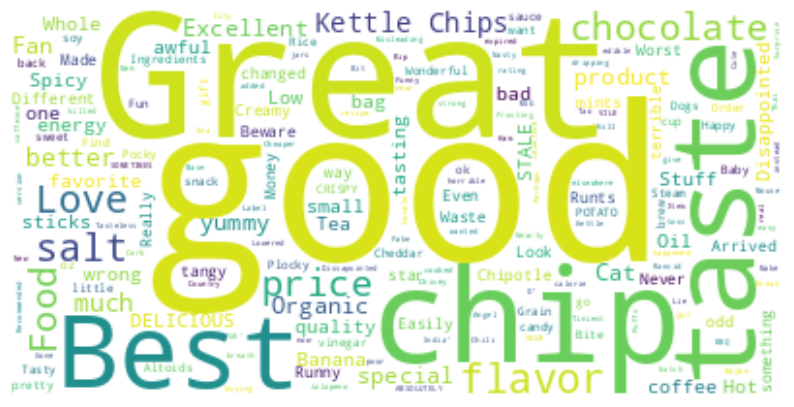

In [11]:
from wordcloud import WordCloud



reviews_str = " ".join(reviews_sample["Summary"].to_numpy())



#reviews_str = reviews_sample.Summary.str.cat()



wordcloud = WordCloud(background_color='white').generate(reviews_str)

plt.figure(figsize=(10,10))

plt.imshow(wordcloud,interpolation='bilinear')

plt.axis("off")

plt.show()